In [1]:
import librosa

y, sr = librosa.load("hemant speech 2.wav")

### Worksheet

In [2]:
from IPython.display import Audio

Audio(data=y, rate=sr)

In [3]:
librosa.get_duration(y=y, sr=sr)

4.565351473922902

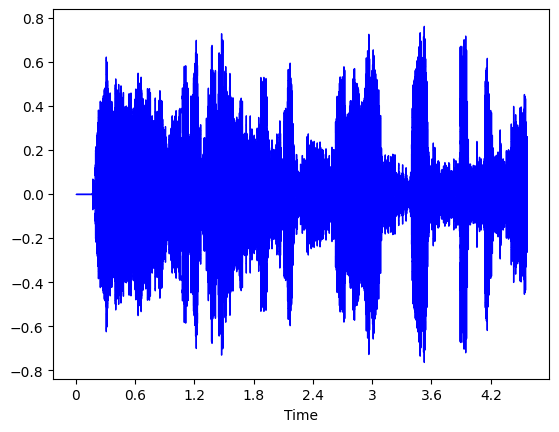

In [4]:
import librosa.display
librosa.display.waveshow(y,color = 'blue')

In [5]:
yt, index = librosa.effects.trim(y)

In [6]:
Audio(data=yt, rate=sr)

In [7]:
librosa.get_duration(y=yt, sr=sr)

4.426031746031746

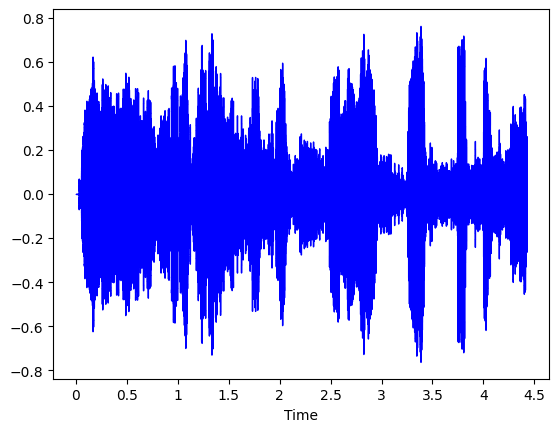

In [8]:
librosa.display.waveshow(yt,color = 'blue')

In [9]:
nonmutesections=librosa.effects.split(y,top_db=10)
nonmutesections

array([[  4096,  39424],
       [ 40448,  43520],
       [ 45568,  49152],
       [ 57856,  68608],
       [ 74752,  79360],
       [ 84992,  88064],
       [ 90624,  93184],
       [ 97280, 100666]])

In [10]:
segment = y[11776:19968]
Audio(segment,rate=sr)

In [11]:
import matplotlib.pyplot as plt

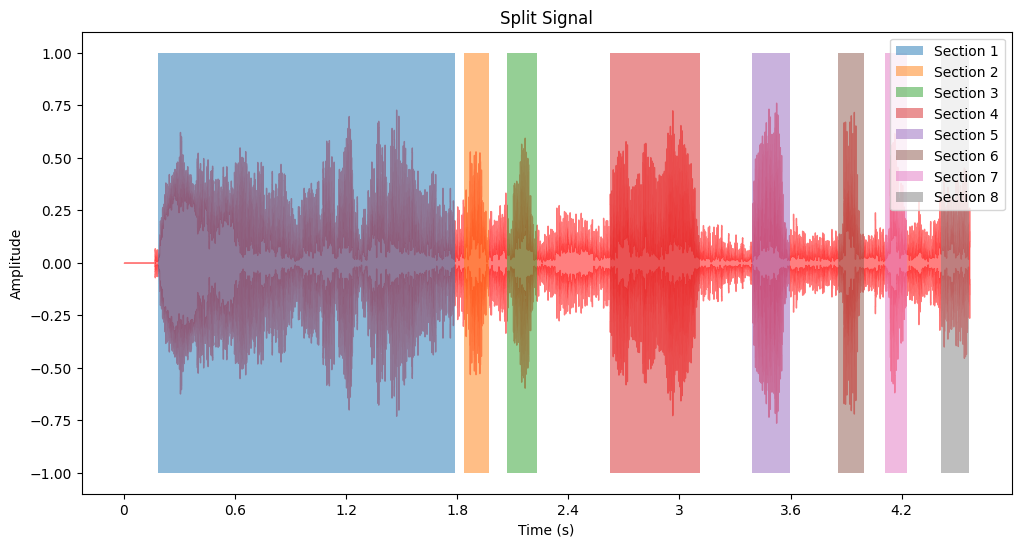

In [12]:
sections = librosa.effects.split(y, top_db=10)

# Plot the split signal
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color="red")
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

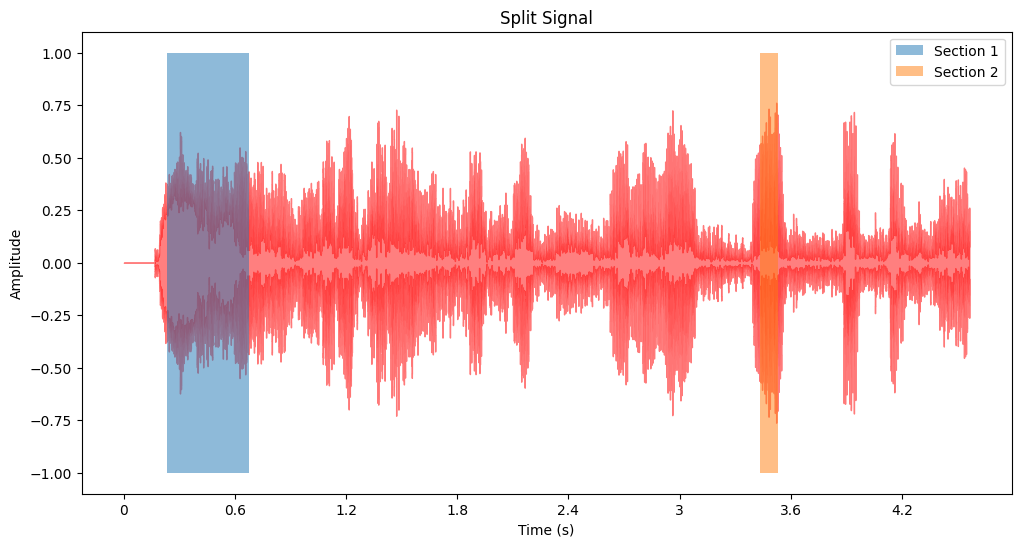

In [13]:
sections = librosa.effects.split(y, top_db=3)

# Plot the split signal
plt.figure(figsize=(12, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color="red")
for i, section in enumerate(sections):
    plt.fill_betweenx([-1, 1], section[0]/sr, section[1]/sr, alpha=0.5, label=f'Section {i+1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Split Signal')
plt.legend()
plt.show()

### Paper

In [14]:
N = 1102 # number of samples taken in 50 ms. 1s -> 22050 samples. 50 ms -> 1102 samples
Ek = []  #continuos average energy
for k in range(len(y)-N+1):
    sum = 0
    for i in range(k,N+k):
        sum += y[i]*y[i]
    Ek.append((1/N)*sum)

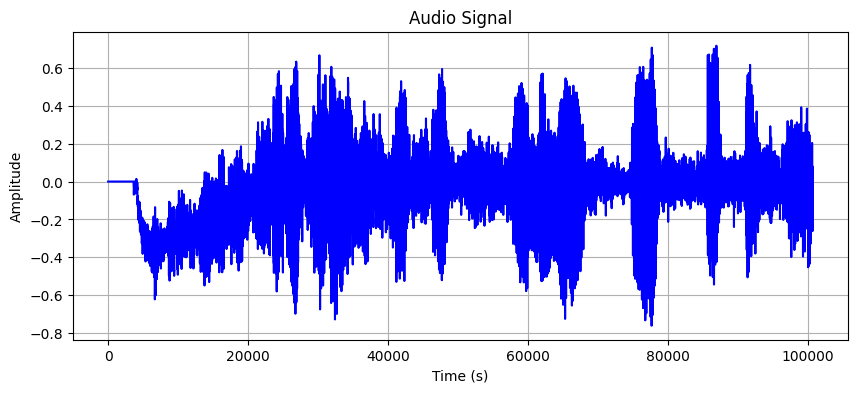

In [15]:
import matplotlib.pyplot as plt
import numpy as np
T = 4
t = np.linspace(0, T, int(T * sr), endpoint=False)  # Time vector
plt.figure(figsize=(10, 4))
plt.plot(y, color='blue')
plt.title('Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

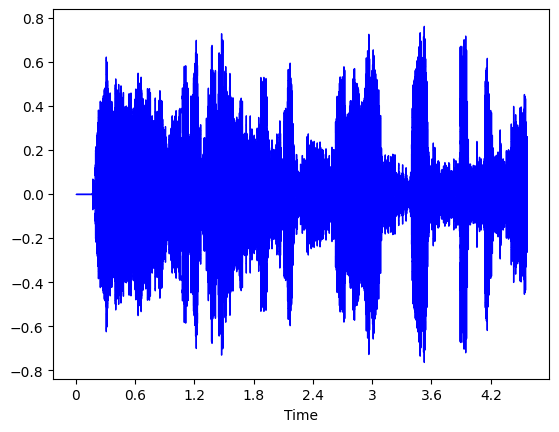

In [16]:
librosa.display.waveshow(y,color = 'blue')

In [17]:
import numpy as np
Ek_arr = np.array(Ek)
print(Ek_arr)

[0.         0.         0.         ... 0.02161139 0.02160366 0.02158687]


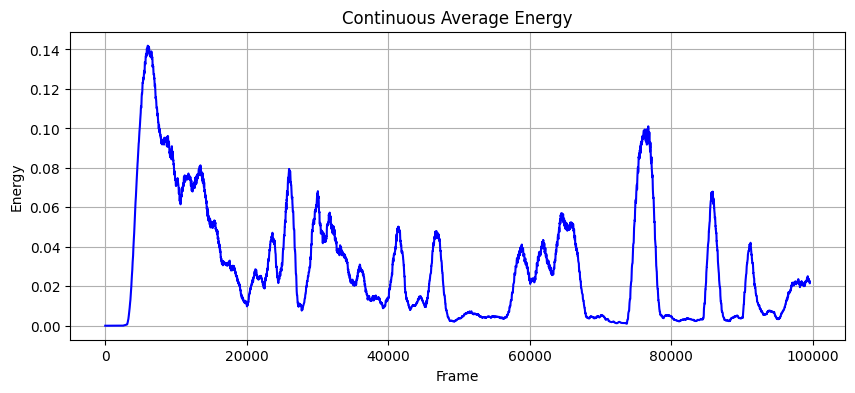

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(Ek_arr, color="blue")
plt.title('Continuous Average Energy')
plt.xlabel('Frame')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

In [20]:
import statistics
Em = []
mean = statistics.mean(Ek_arr)
var = statistics.variance(Ek_arr)
for i in range(len(Ek_arr)):
    Em.append((Ek_arr[i] - mean)/var)
Em_arr = np.array(Em)

In [21]:
print(Em_arr)


[-34.26621941 -34.26621941 -34.26621941 ...  -9.38640631  -9.39529511
  -9.41463258]


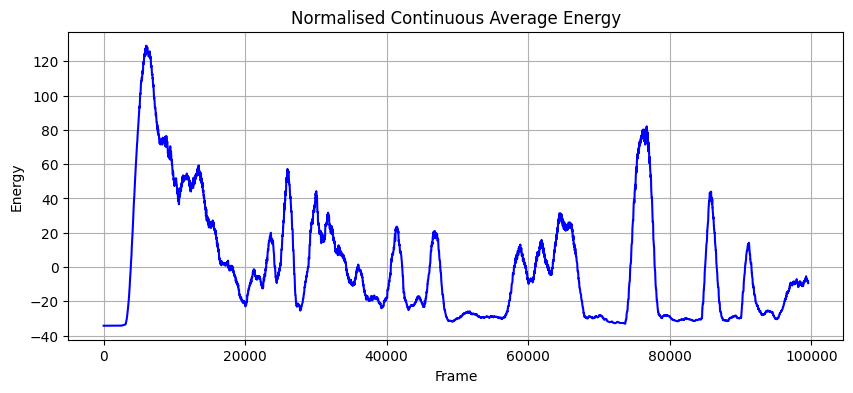

In [22]:
plt.figure(figsize=(10, 4))
plt.plot(Em_arr, color="blue")
plt.title('Normalised Continuous Average Energy')
plt.xlabel('Frame')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

In [23]:
Audio(Em_arr,rate = sr)

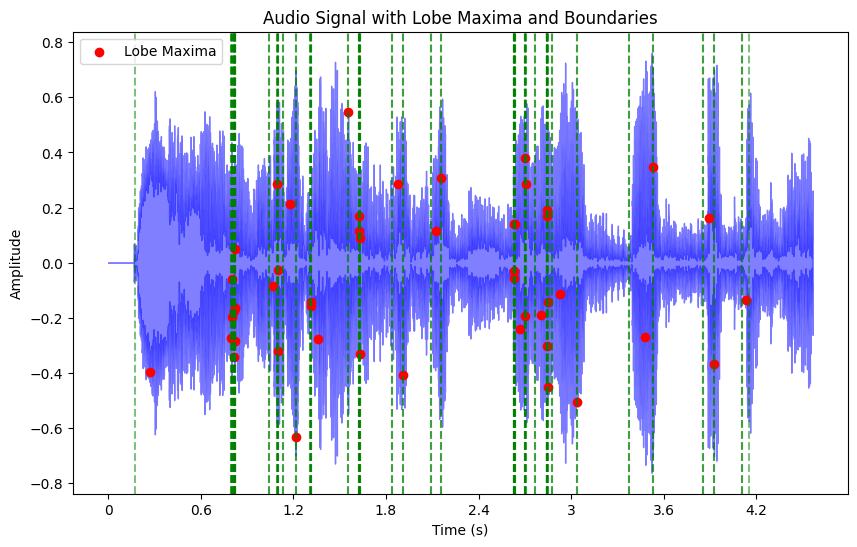

In [26]:
zero_crossings_Energy = np.where(np.diff(np.sign(Em_arr)))[0]
lobe_maxima_indices = []
lobe_boundaries = []

for i in range(len(zero_crossings_Energy) - 1):
    lobe_start = zero_crossings_Energy[i]
    lobe_end = zero_crossings_Energy[i + 1]
    

    lobe_max_index = lobe_start + np.argmax(Em_arr[lobe_start:lobe_end])
    
    lobe_maxima_indices.append(lobe_max_index)
    
    lobe_boundaries.append((lobe_start, lobe_end))

plt.figure(figsize=(10, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.5, color="blue")

lobe_maxima_times = librosa.samples_to_time(lobe_maxima_indices, sr=sr)
lobe_boundaries_times = librosa.samples_to_time(np.array(lobe_boundaries).flatten(), sr=sr)

plt.scatter(lobe_maxima_times, y[lobe_maxima_indices], color='r', label='Lobe Maxima')

for start, end in zip(lobe_boundaries_times[::2], lobe_boundaries_times[1::2]):
    plt.axvline(x=start, color='g', linestyle='--', alpha=0.5)
    plt.axvline(x=end, color='g', linestyle='--', alpha=0.5)

plt.title('Audio Signal with Lobe Maxima and Boundaries')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

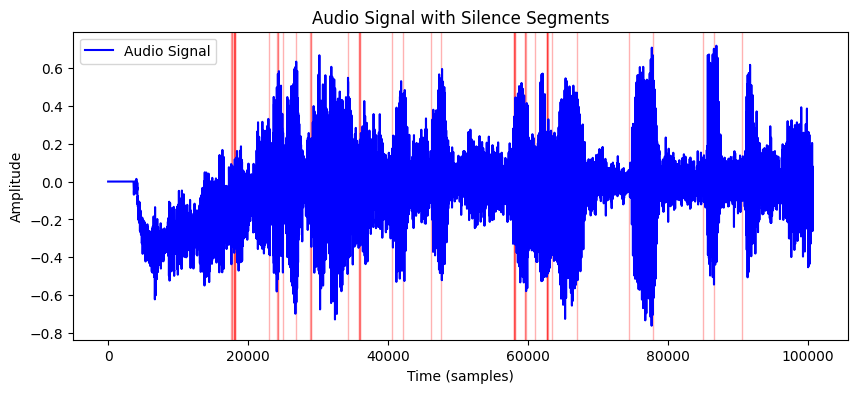

In [39]:
import numpy as np
import matplotlib.pyplot as plt

silence_segments = []
for i in range(len(lobe_boundaries) - 1):
    silence_start = lobe_boundaries[i][1] 
    silence_end = lobe_boundaries[i + 1][0]  
    silence_segments.append((silence_start, silence_end))

plt.figure(figsize=(10, 4))
plt.plot(y, color='blue', label='Audio Signal')

for segment in silence_segments:
    plt.axvspan(segment[0], segment[1], color='red', alpha=0.3)

plt.title('Audio Signal with Silence Segments')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
